# Libraries

In [796]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.regressionplots import influence_plot 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('float_format', '{:.2f}'.format)

# Data Sourcing

In [797]:
bike_df = pd.read_csv('data/day.csv')
print('Dataset shape: ',bike_df.shape,'\n')
bike_df.info()

Dataset shape:  (730, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


> null values are not there in the dataset

In [798]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


> renaming the columns

In [799]:
bike_df.rename(columns={'dteday':'date','yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)

In [800]:
bike_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [801]:
bike_df['date'] = pd.to_datetime(bike_df['date'], format=('%d-%m-%Y'))

Mapping the original values to the variables

> season: 1:Spring, 2:Summer, 3:Fall, 4:Winter

> month: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec

> weathersit: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow

> year: 0: 2018, 1:2019

In [802]:
bike_df['season']=bike_df['season'].map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_df['month']=bike_df['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df['weathersit']=bike_df['weathersit'].map({1: 'clear',2:'mist',3:'light_rain_Snow',4:'snow _fog'})
bike_df['year']=bike_df['year'].map({0: 2018, 1:2019})

> mapping the weekday as per the date

In [803]:
bike_df['weekday'] = bike_df['date'].apply(lambda x: x.strftime('%a'))

# Understanding the dataset

<AxesSubplot: xlabel='season', ylabel='count'>

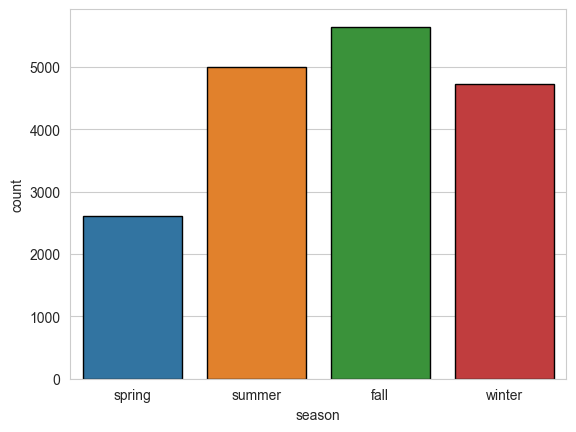

In [804]:
sns.set_style('whitegrid')
sns.barplot(x='season',y='count',data=bike_df,ci=None,edgecolor='black')

> booking count is highest in fall season

<AxesSubplot: xlabel='year', ylabel='count'>

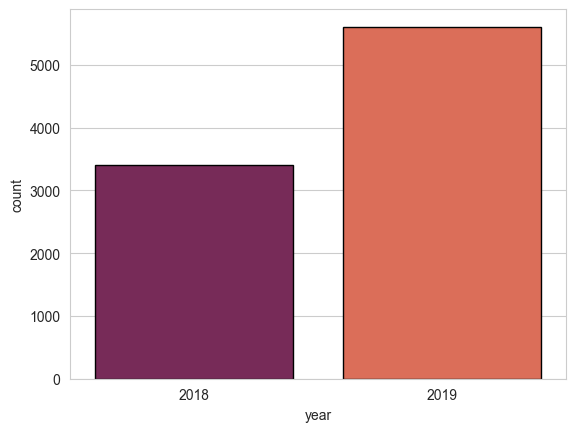

In [805]:
sns.set_style('whitegrid')
sns.barplot(x='year',y='count',data=bike_df,palette='rocket',ci=None,edgecolor='black')

> booking count in 2019 is higher than 2018

<AxesSubplot: xlabel='month', ylabel='count'>

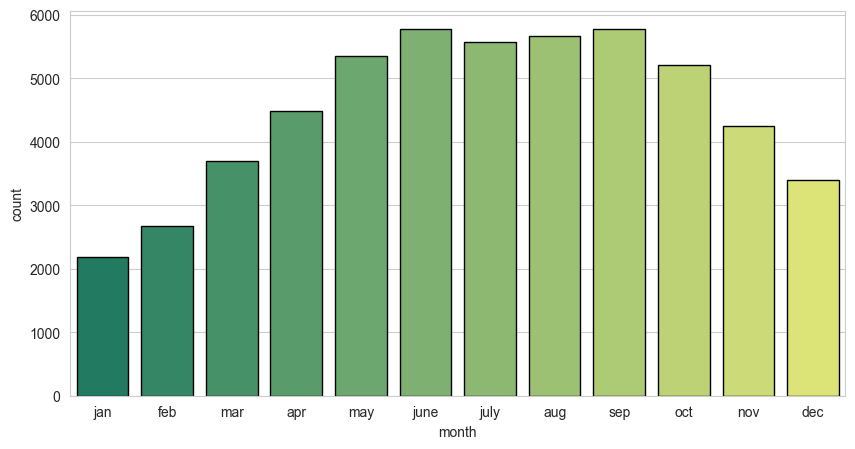

In [806]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='count',data=bike_df,palette='summer',ci=None,edgecolor='black')

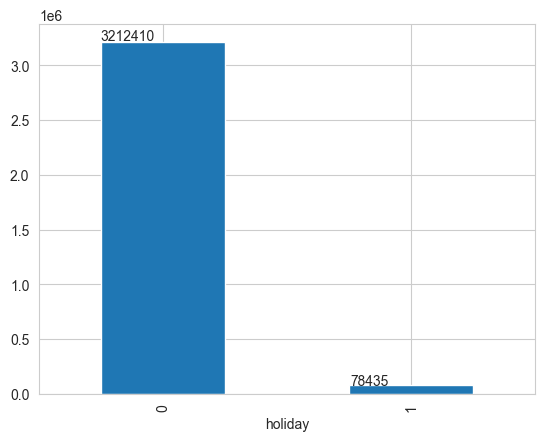

In [807]:
sns.set_style('whitegrid')
ax = bike_df.groupby('holiday')['count'].sum().plot(kind='bar')
for p in ax.patches: ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [808]:
bike_df['holiday'].value_counts() / bike_df.shape[0] * 100

0   97.12
1    2.88
Name: holiday, dtype: float64

<AxesSubplot: xlabel='weekday', ylabel='count'>

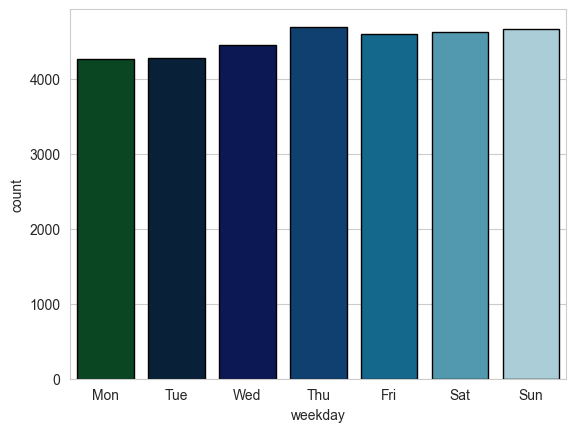

In [809]:
sns.set_style('whitegrid')
sns.barplot(x='weekday',y='count',data=bike_df,palette='ocean',ci=None,edgecolor='black')

<AxesSubplot: xlabel='workingday', ylabel='count'>

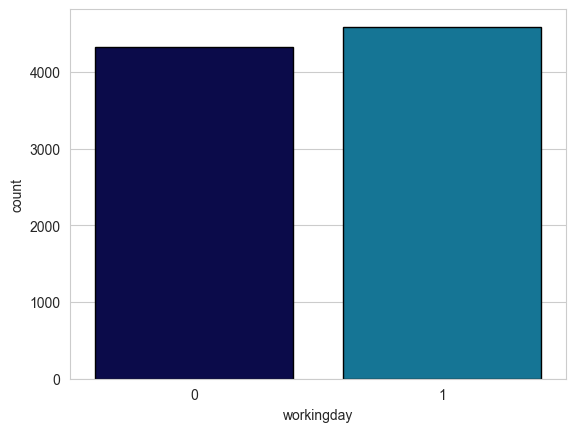

In [810]:
sns.set_style('whitegrid')
sns.barplot(x='workingday',y='count',data=bike_df,palette='ocean',ci=None,edgecolor='black')

In [811]:
bike_df['workingday'].value_counts() / bike_df.shape[0] * 100

1   68.36
0   31.64
Name: workingday, dtype: float64

<AxesSubplot: xlabel='weathersit', ylabel='count'>

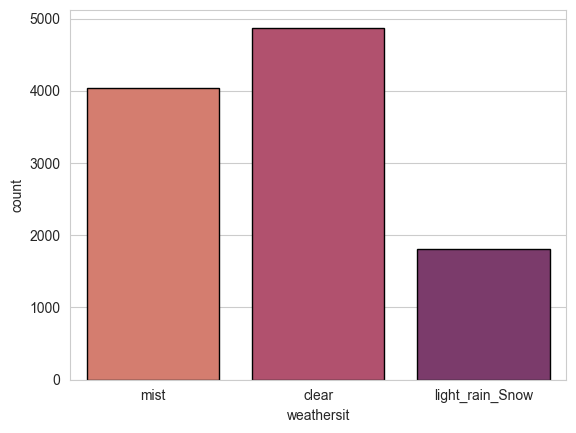

In [812]:
sns.set_style('whitegrid')
sns.barplot(x='weathersit',y='count',data=bike_df,palette='flare',ci=None,edgecolor='black')

<AxesSubplot: xlabel='temp', ylabel='Density'>

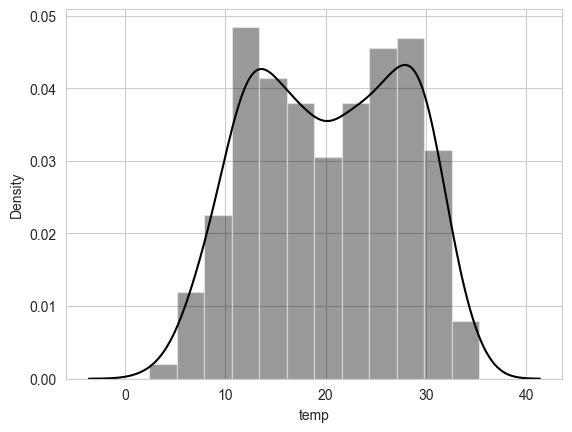

In [813]:
sns.set_style('whitegrid')
sns.distplot(bike_df['temp'],color='black')

<AxesSubplot: xlabel='humidity', ylabel='Density'>

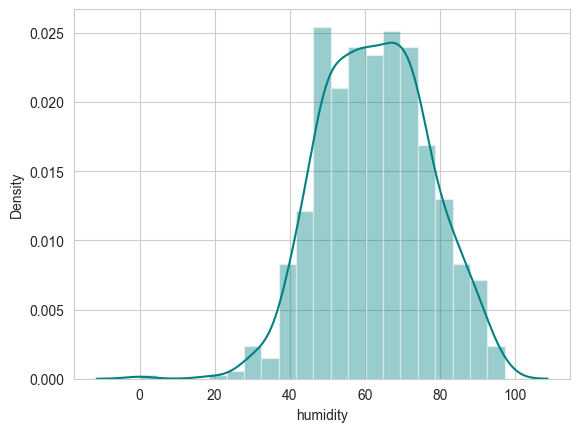

In [814]:
sns.set_style('whitegrid')
sns.distplot(bike_df['humidity'],color='teal')

<AxesSubplot: xlabel='windspeed', ylabel='Density'>

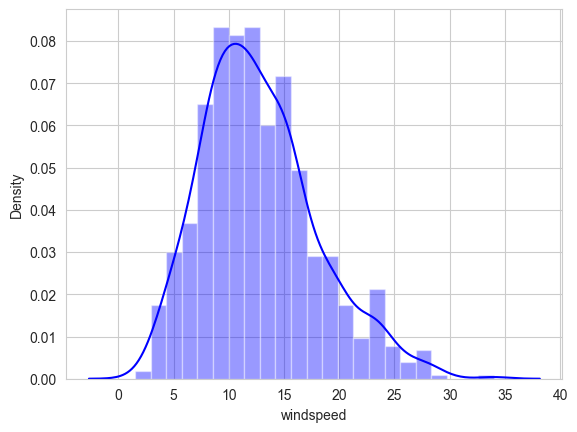

In [815]:
sns.set_style('whitegrid')
sns.distplot(bike_df['windspeed'],color='blue')

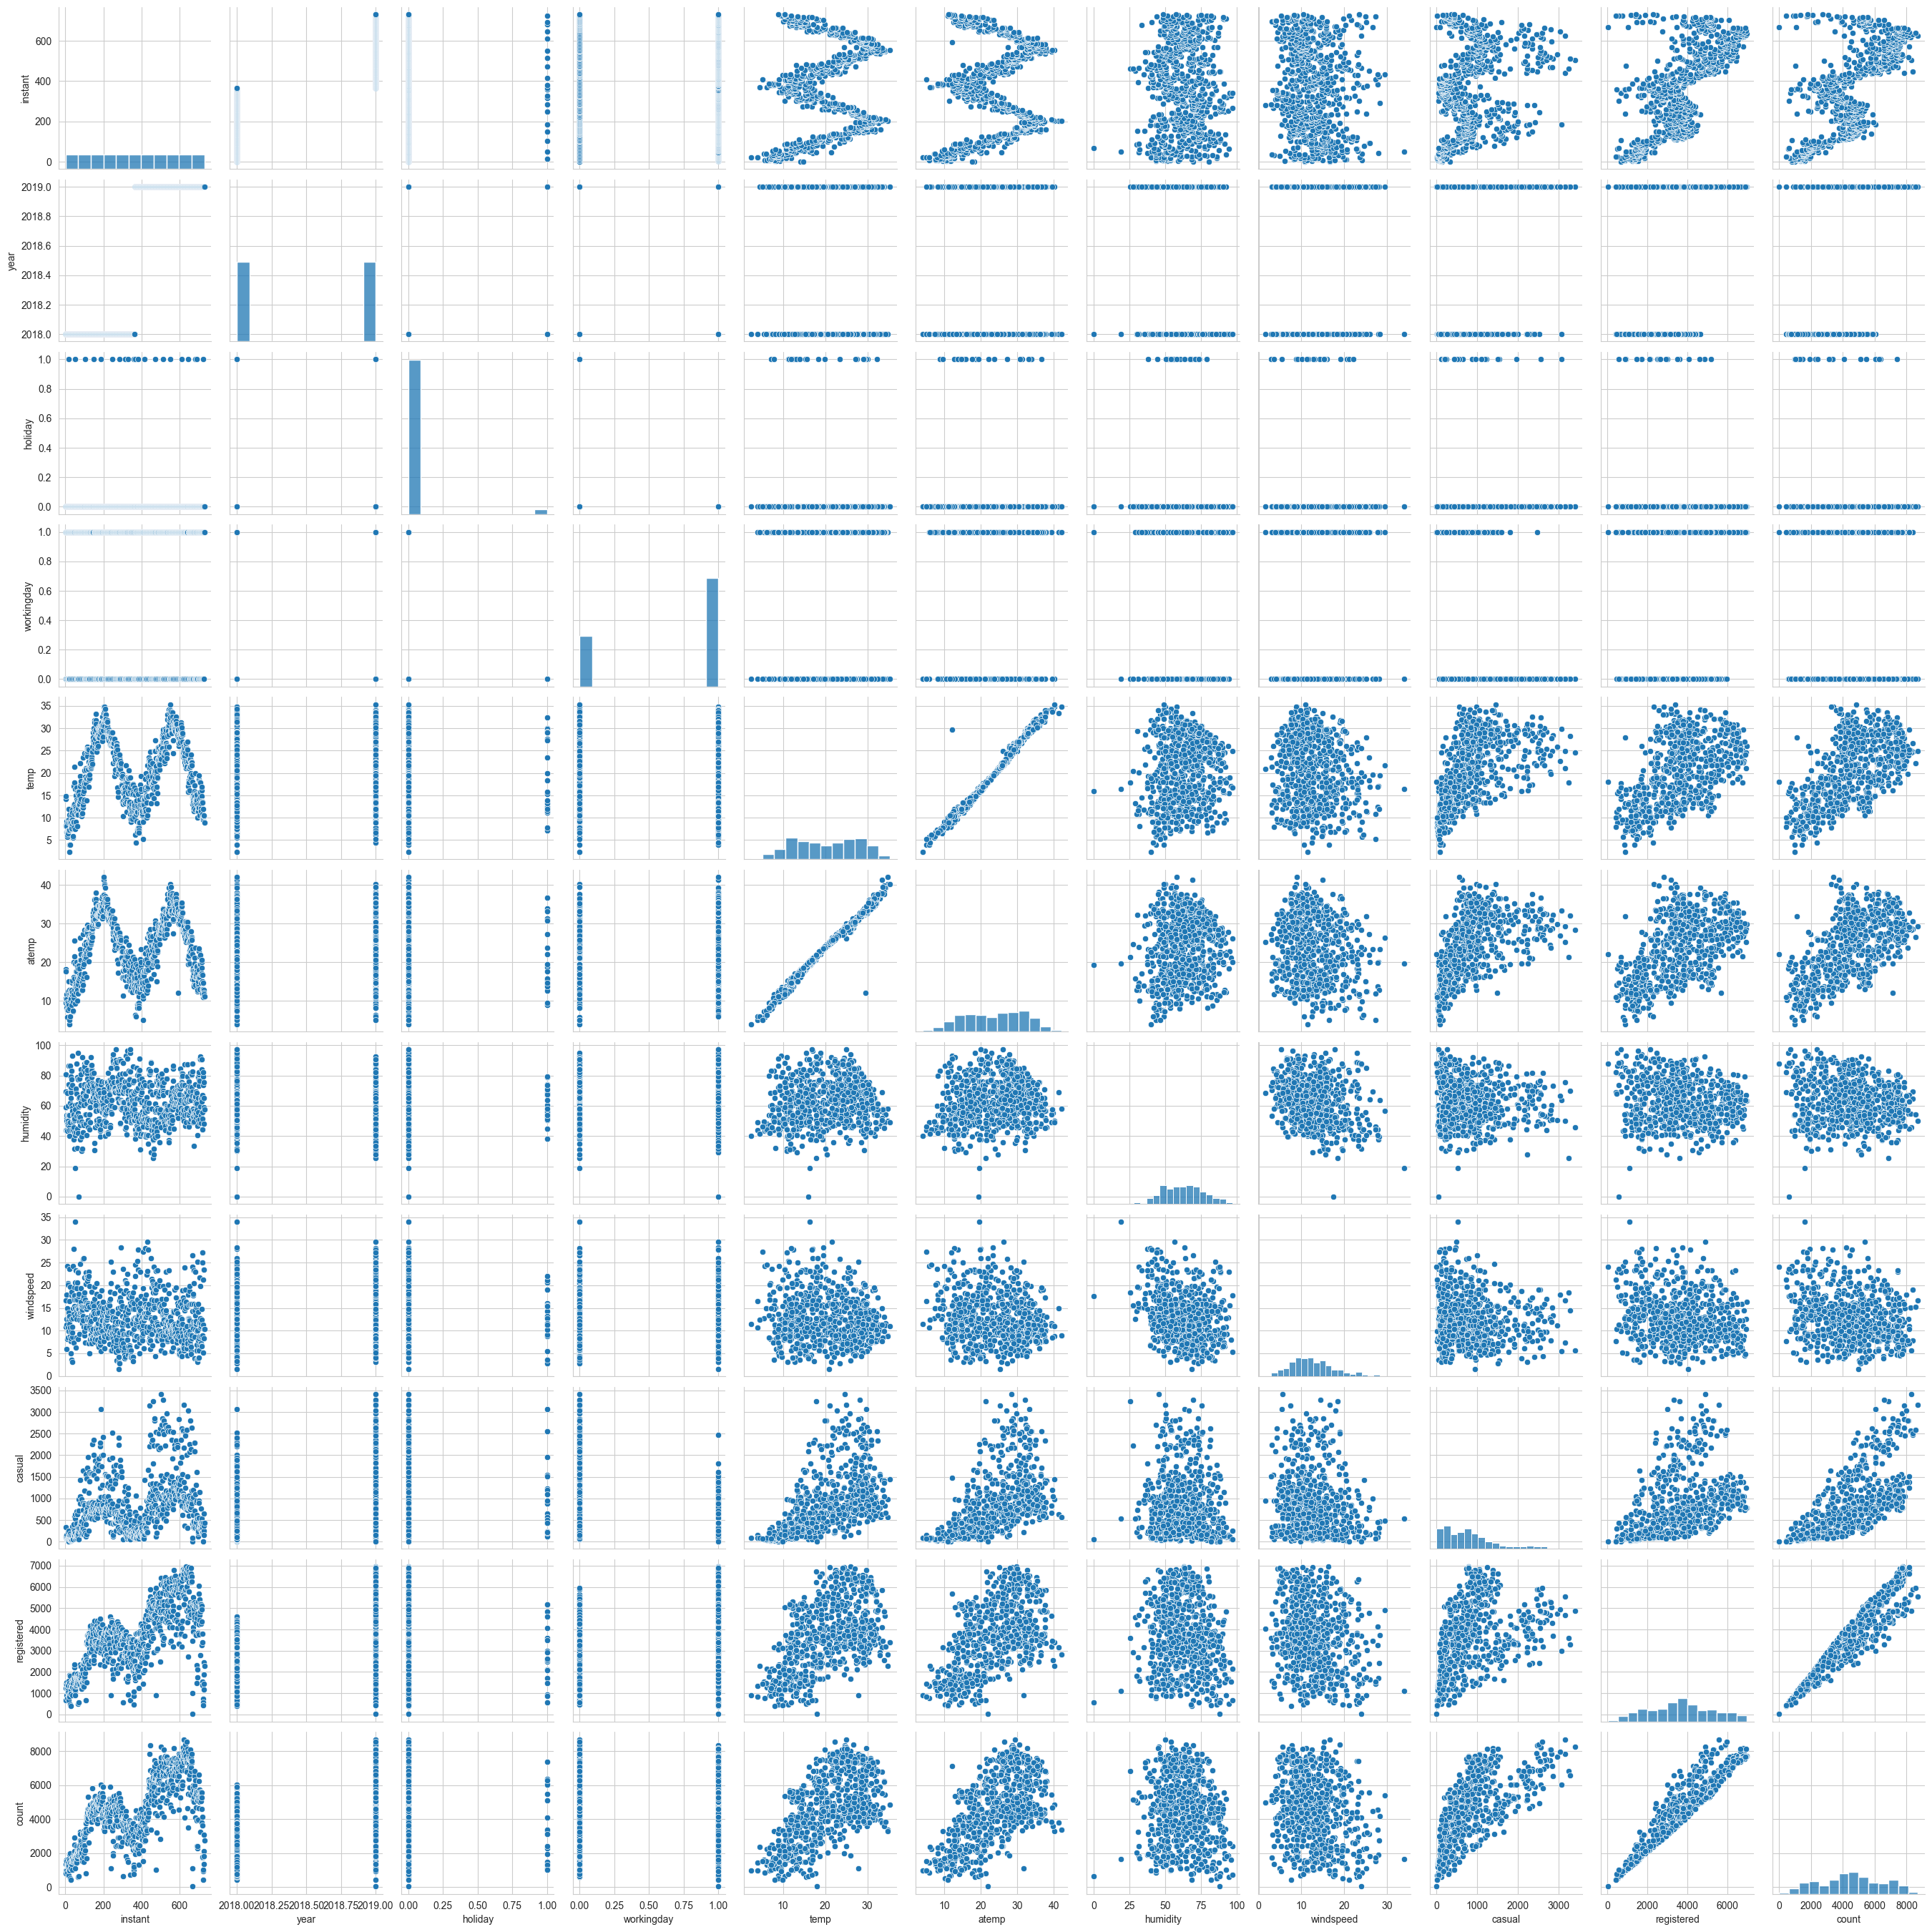

In [816]:
sns.pairplot(bike_df)

Text(0.5, 1.0, 'Correlation Matrix')

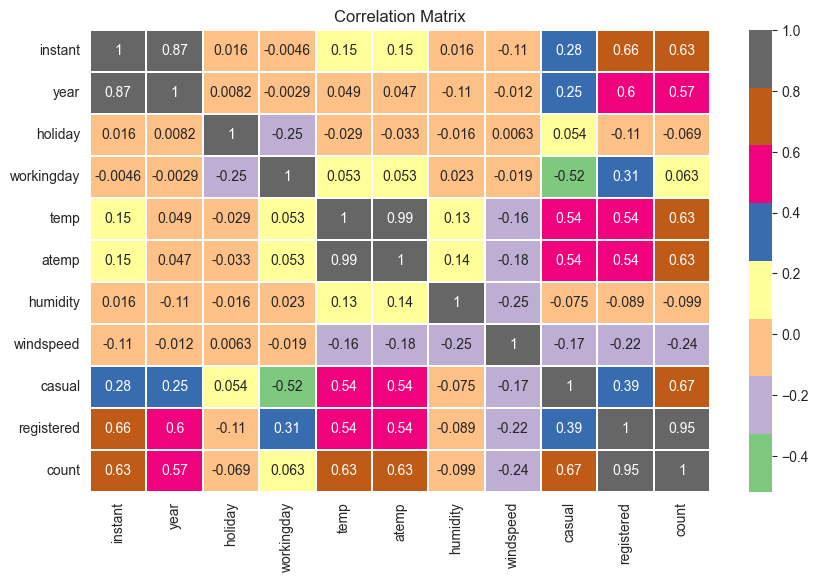

In [817]:
plt.figure(figsize=(10,6))
sns.heatmap(bike_df.corr(), cmap='Accent', linewidths=.1, linecolor='w', annot=True)
plt.title('Correlation Matrix')

# Feature Engineering

> Columns `instant`,`temp`,`atemp`,`casual`,`registered` are highly correlated with our target variable i.e., `count`

> dropping `date`,`atemp`,`casual`,`registered` columns from the dataset

In [818]:
bike_df.drop(['date','atemp','casual','registered'],axis=1,inplace=True)

> getting dummies from categorical variables

> dropping the unused categorical variables

In [819]:
dummies = pd.get_dummies(bike_df.select_dtypes('object'),drop_first=True)
bike_df_1 = bike_df.drop(bike_df.select_dtypes('object').columns,axis=1)
bike_df_1 = pd.concat([bike_df_1,dummies],axis=1)

In [820]:
bike_df_1['year'] = bike_df_1['year'].map({2018:0,2019:1})

In [821]:
bike_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   instant                     730 non-null    int64  
 1   year                        730 non-null    int64  
 2   holiday                     730 non-null    int64  
 3   workingday                  730 non-null    int64  
 4   temp                        730 non-null    float64
 5   humidity                    730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   count                       730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  month_aug                   730 non-null    uint8  
 12  month_dec                   730 non-null    uint8  
 13  month_feb                   730 non

Text(0.5, 1.0, 'Correlation Matrix')

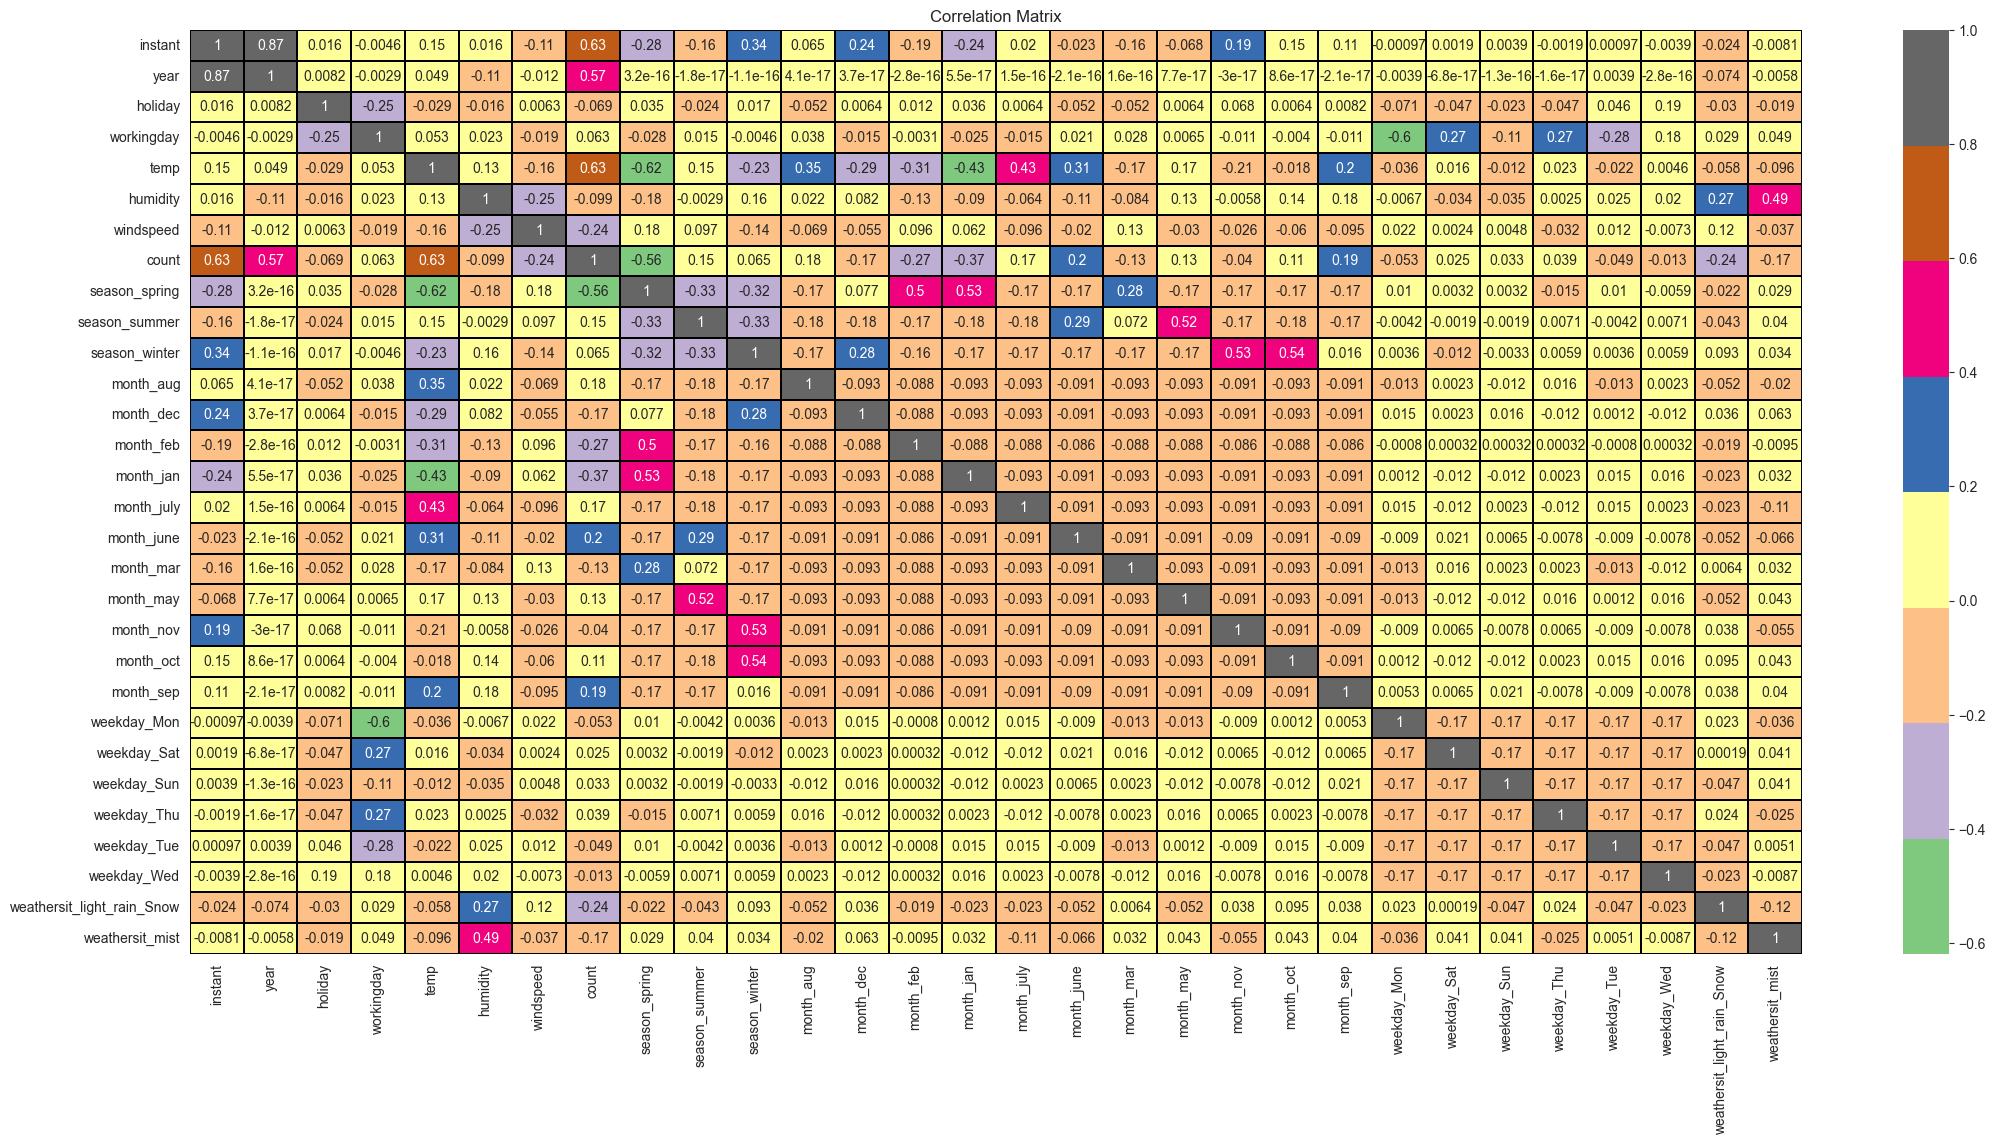

In [822]:
plt.figure(figsize=(26,12))
sns.heatmap(bike_df_1.corr(), cmap='Accent', linewidths=0.1, linecolor='black', annot=True)
plt.title('Correlation Matrix')

Insights:

> `season_spring` is negative correlated with `temp`

> `weekday_Monday` is negatively correlated with `working_day`

> `season_winter` is correlated with `month_nov` and `month_oct`

> `season_summer` is correlated with `month_may`

# Building the Model

In [823]:
X = bike_df_1.drop(['instant','count'],axis=1)
y = bike_df_1['count']

> Using Recursive Feature Elimination to select the relevant features.

In [824]:
lr = LinearRegression()
lr.fit(X, y)

rfe = RFE(lr, n_features_to_select=18)
rfe = rfe.fit(X, y)

In [825]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('humidity', False, 9),
 ('windspeed', False, 4),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('month_aug', False, 6),
 ('month_dec', True, 1),
 ('month_feb', True, 1),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', True, 1),
 ('month_mar', False, 7),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', False, 3),
 ('month_sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', True, 1),
 ('weathersit_light_rain_Snow', True, 1),
 ('weathersit_mist', True, 1)]

In [826]:
X.columns[rfe.support_]

Index(['year', 'holiday', 'temp', 'season_spring', 'season_winter',
       'month_dec', 'month_feb', 'month_jan', 'month_july', 'month_june',
       'month_may', 'month_nov', 'month_sep', 'weekday_Mon', 'weekday_Tue',
       'weekday_Wed', 'weathersit_light_rain_Snow', 'weathersit_mist'],
      dtype='object')

In [827]:
X.columns[~rfe.support_]

Index(['workingday', 'humidity', 'windspeed', 'season_summer', 'month_aug',
       'month_mar', 'month_oct', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu'],
      dtype='object')

In [828]:
X_rfe = X[X.columns[rfe.support_]]

> splitting into train and test dataset in 80-20 ratio.

In [829]:
x_train,x_valid,y_train,y_valid = train_test_split(X_rfe,y,test_size=0.2,random_state=21)
x_train.shape,x_valid.shape,y_train.shape,y_valid.shape

((584, 18), (146, 18), (584,), (146,))

> scaling the numerical feature with Standard Scaler.

In [830]:
scaler = StandardScaler()

x_train[['temp']] = scaler.fit_transform(x_train[['temp']])

In [831]:
X_train = sm.add_constant(x_train)
lm1 = sm.OLS(y_train, X_train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     157.6
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          1.44e-206
Time:                        19:49:47   Log-Likelihood:                -4734.9
No. Observations:                 584   AIC:                             9508.
Df Residuals:                     565   BIC:                             9591.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       4017.1768     94.650     42.442      0.000    3831.268    4203.086
year                        2096.1845     68.091     30.785      0.000    1962.443    2229.926
holiday                     -752.1307    213.776     -3.518      0.000   -1172.023    -332.238
temp                         733.1942     66.256     11.066      0.000     603.057     863.331
season_spring               -910.1812    159.565     -5.704      0.000   -1223.594    -596.768
season_winter                786.8223    119.788      6.568      0.000     551.539    1022.106
month_dec                   -656.0915    149.679     -4.383      0.000    -950.086    -362.097
month_feb                   -333.0950    182.886     -1.821      0.069    -692.314      26.124
month_jan                   -498.3724    183.509     -2.716      0.007    -858.815    -137.930
month_july                  -197.1329    154.399     -1.277      0.202    -500.398     106.132
month_june                   229.2588    148.402      1.545      0.123     -62.228     520.746
month_may                    373.5716    145.066      2.575      0.010      88.638     658.506
month_nov                   -672.3628    160.812     -4.181      0.000    -988.226    -356.499
month_sep                    493.6194    137.818      3.582      0.000     222.921     764.318
weekday_Mon                 -314.1746     98.174     -3.200      0.001    -507.005    -121.344
weekday_Tue                 -287.9004     99.395     -2.897      0.004    -483.130     -92.671
weekday_Wed                 -201.8898    103.635     -1.948      0.052    -405.447       1.667
weathersit_light_rain_Snow -2521.8391    195.328    -12.911      0.000   -2905.497   -2138.182
weathersit_mist             -659.7204     73.967     -8.919      0.000    -805.004    -514.437
==============================================================================
Omnibus:                       99.689   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.771
Skew:                          -0.808   Prob(JB):                     6.60e-67
Kurtosis:                       6.148   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> now we have to iterate a step i.e., removing the insignificant variable (variable having highest pvalue) one by one.

In [832]:
x_train.drop('month_july',axis=1,inplace=True)

X_train = sm.add_constant(x_train)
lm2 = sm.OLS(y_train, X_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     166.6
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          2.47e-207
Time:                        19:49:47   Log-Likelihood:                -4735.7
No. Observations:                 584   AIC:                             9507.
Df Residuals:                     566   BIC:                             9586.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3985.2681     91.342     43.630      0.000    3805.857    4164.679
year                        2100.7280     68.036     30.877      0.000    1967.095    2234.361
holiday                     -752.7273    213.894     -3.519      0.000   -1172.851    -332.604
temp                         695.3857     59.303     11.726      0.000     578.905     811.866
season_spring               -900.1471    159.460     -5.645      0.000   -1213.353    -586.941
season_winter                810.3765    118.425      6.843      0.000     577.771    1042.982
month_dec                   -678.6060    148.719     -4.563      0.000    -970.714    -386.497
month_feb                   -353.3547    182.297     -1.938      0.053    -711.417       4.708
month_jan                   -530.0046    181.930     -2.913      0.004    -887.345    -172.665
month_june                   299.6923    137.844      2.174      0.030      28.943     570.441
month_may                    425.2792    139.376      3.051      0.002     151.522     699.036
month_nov                   -691.2382    160.221     -4.314      0.000   -1005.938    -376.539
month_sep                    544.4140    132.025      4.124      0.000     285.096     803.732
weekday_Mon                 -321.4001     98.065     -3.277      0.001    -514.017    -128.783
weekday_Tue                 -292.7533     99.378     -2.946      0.003    -487.948     -97.558
weekday_Wed                 -201.0306    103.691     -1.939      0.053    -404.696       2.635
weathersit_light_rain_Snow -2521.5733    195.436    -12.902      0.000   -2905.443   -2137.704
weathersit_mist             -656.5088     73.965     -8.876      0.000    -801.788    -511.229
==============================================================================
Omnibus:                      102.501   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.040
Skew:                          -0.834   Prob(JB):                     2.87e-68
Kurtosis:                       6.163   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [833]:
x_train.drop('month_feb',axis=1,inplace=True)

X_train = sm.add_constant(x_train)
lm3 = sm.OLS(y_train, X_train).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          1.18e-207
Time:                        19:49:47   Log-Likelihood:                -4737.7
No. Observations:                 584   AIC:                             9509.
Df Residuals:                     567   BIC:                             9584.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3968.7703     91.165     43.534      0.000    3789.707    4147.834
year                        2100.6220     68.201     30.801      0.000    1966.665    2234.579
holiday                     -758.4454    214.393     -3.538      0.000   -1179.547    -337.344
temp                         717.7572     58.310     12.309      0.000     603.227     832.287
season_spring              -1059.0959    137.091     -7.725      0.000   -1328.365    -789.827
season_winter                794.0874    118.413      6.706      0.000     561.506    1026.669
month_dec                   -572.8438    138.684     -4.131      0.000    -845.241    -300.447
month_jan                   -324.5155    148.209     -2.190      0.029    -615.622     -33.409
month_june                   292.5946    138.130      2.118      0.035      21.285     563.904
month_may                    427.7110    139.708      3.061      0.002     153.302     702.120
month_nov                   -643.2662    158.682     -4.054      0.000    -954.943    -331.590
month_sep                    548.2256    132.331      4.143      0.000     288.308     808.144
weekday_Mon                 -323.1388     98.299     -3.287      0.001    -516.214    -130.063
weekday_Tue                 -294.2218     99.616     -2.954      0.003    -489.884     -98.559
weekday_Wed                 -203.1960    103.936     -1.955      0.051    -407.343       0.951
weathersit_light_rain_Snow -2520.2318    195.910    -12.864      0.000   -2905.029   -2135.434
weathersit_mist             -651.7936     74.105     -8.796      0.000    -797.347    -506.241
==============================================================================
Omnibus:                       95.588   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.734
Skew:                          -0.778   Prob(JB):                     1.22e-63
Kurtosis:                       6.080   Cond. No.                         8.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [834]:
x_train.drop('weekday_Wed',axis=1,inplace=True)

X_train = sm.add_constant(x_train)
lm4 = sm.OLS(y_train, X_train).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     186.5
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          5.65e-208
Time:                        19:49:47   Log-Likelihood:                -4739.6
No. Observations:                 584   AIC:                             9511.
Df Residuals:                     568   BIC:                             9581.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3923.4683     88.390     44.388      0.000    3749.857    4097.080
year                        2103.6806     68.352     30.777      0.000    1969.427    2237.934
holiday                     -844.9130    210.302     -4.018      0.000   -1257.978    -431.849
temp                         719.8079     58.445     12.316      0.000     605.013     834.603
season_spring              -1049.6123    137.345     -7.642      0.000   -1319.379    -779.845
season_winter                786.9529    118.650      6.633      0.000     553.906    1020.000
month_dec                   -567.4523    139.001     -4.082      0.000    -840.470    -294.434
month_jan                   -332.1060    148.526     -2.236      0.026    -623.833     -40.379
month_june                   299.1758    138.432      2.161      0.031      27.275     571.077
month_may                    433.6558    140.022      3.097      0.002     158.632     708.680
month_nov                   -634.4709    159.012     -3.990      0.000    -946.794    -322.148
month_sep                    546.7271    132.657      4.121      0.000     286.170     807.285
weekday_Mon                 -284.3086     96.511     -2.946      0.003    -473.870     -94.747
weekday_Tue                 -250.9164     97.363     -2.577      0.010    -442.153     -59.680
weathersit_light_rain_Snow -2504.8938    196.238    -12.765      0.000   -2890.335   -2119.452
weathersit_mist             -643.6193     74.170     -8.678      0.000    -789.300    -497.938
==============================================================================
Omnibus:                       96.567   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.534
Skew:                          -0.776   Prob(JB):                     3.33e-66
Kurtosis:                       6.159   Cond. No.                         8.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [835]:
def get_vif(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [836]:
get_vif(x_train)

,features,VIF
3,season_spring,2.66
4,season_winter,2.39
2,temp,2.35
9,month_nov,1.76
0,year,1.73
6,month_jan,1.69
5,month_dec,1.50
14,weathersit_mist,1.43
7,month_june,1.21
10,month_sep,1.17


> we can consider `lm4` as a good model as p_value of all the variables is below 0.05 and VIF is less than 3.

> checking influence of the records

<Figure size 1500x1000 with 0 Axes>

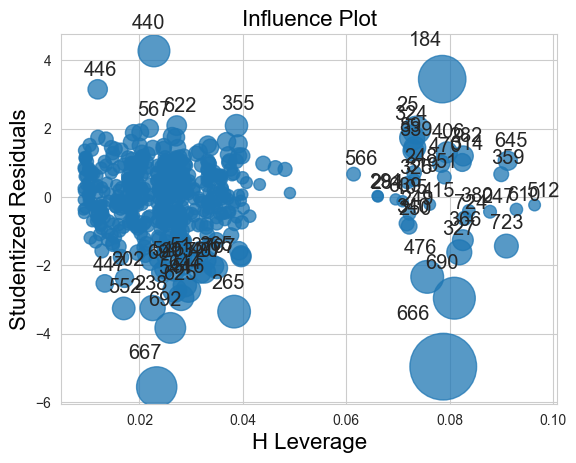

In [837]:
plt.figure(figsize=(15, 10))
influence_plot(lm4)
plt.show()

> filtering out the records that have comparatively high leverage with residuals

In [838]:
x_train.drop([666,667,690,440,184,265,692,476,446,25,355],inplace=True)
y_train.drop([666,667,690,440,184,265,692,476,446,25,355],inplace=True)

X_train = sm.add_constant(x_train)
lm5 = sm.OLS(y_train, X_train).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     242.7
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          9.39e-233
Time:                        19:49:48   Log-Likelihood:                -4573.6
No. Observations:                 573   AIC:                             9179.
Df Residuals:                     557   BIC:                             9249.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3920.2490     77.775     50.405      0.000    3767.482    4073.016
year                        2163.8770     60.509     35.761      0.000    2045.024    2282.730
holiday                     -881.3210    196.494     -4.485      0.000   -1267.280    -495.362
temp                         641.6041     51.857     12.372      0.000     539.744     743.464
season_spring              -1166.4156    122.221     -9.543      0.000   -1406.486    -926.345
season_winter                913.2159    105.553      8.652      0.000     705.885    1120.547
month_dec                   -733.8760    123.655     -5.935      0.000    -976.762    -490.990
month_jan                   -369.0337    131.009     -2.817      0.005    -626.365    -111.702
month_june                   353.5526    121.294      2.915      0.004     115.303     591.803
month_may                    463.0010    122.769      3.771      0.000     221.855     704.147
month_nov                   -732.7444    141.765     -5.169      0.000   -1011.204    -454.285
month_sep                    605.6124    117.420      5.158      0.000     374.973     836.252
weekday_Mon                 -267.5051     84.975     -3.148      0.002    -434.415    -100.595
weekday_Tue                 -201.4797     85.912     -2.345      0.019    -370.230     -32.729
weathersit_light_rain_Snow -2283.3123    187.054    -12.207      0.000   -2650.729   -1915.896
weathersit_mist             -693.1453     65.664    -10.556      0.000    -822.125    -564.165
==============================================================================
Omnibus:                       34.057   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.451
Skew:                          -0.576   Prob(JB):                     2.71e-09
Kurtosis:                       3.570   Cond. No.                         8.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Making Predictions on the Train Dataset

In [839]:
def model_validation(org,pred,c1='b',c2='r',l='Errors'):
    print(f'R2 Score: {r2_score(org, pred) * 100}')
    print(f'Mean Squared Error: {np.sqrt(mean_squared_error(org, pred))}')
    plt.axvline(x=0, color = c2)
    plt.xlabel(l, fontsize = 12)
    sns.distplot(org - pred, rug=True,bins=20,color=c1)
    plt.plot()

In [840]:
y_train_pred = lm5.predict(X_train)

R2 Score: 86.73036240259148
Mean Squared Error: 708.3282362943121


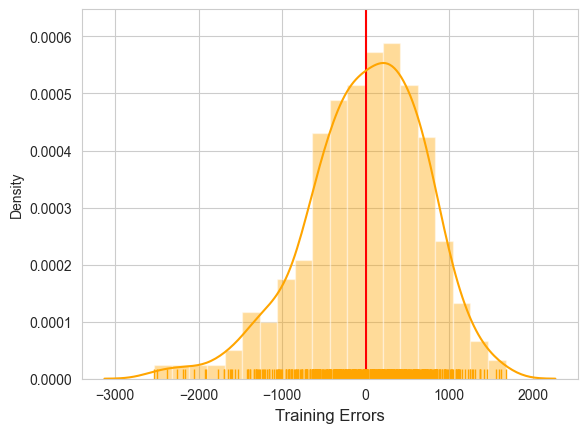

In [841]:
model_validation(y_train,y_train_pred,c1='orange',l='Training Errors')

# Making predictions on the Test Dataset

> scaling test dataset.

In [842]:
x_valid[['temp']] = scaler.fit_transform(x_valid[['temp']])

In [843]:
x_valid = x_valid[x_train.columns]

In [844]:
X_valid = sm.add_constant(x_valid)
y_valid_pred = lm5.predict(X_valid)

R2 Score: 81.03149648370068
Mean Squared Error: 767.5740332576133


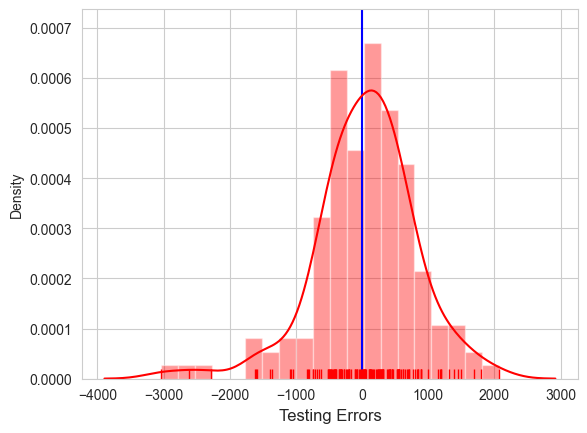

In [845]:
model_validation(y_valid,y_valid_pred,c1='r',c2='b',l='Testing Errors')

# Evaluating the model

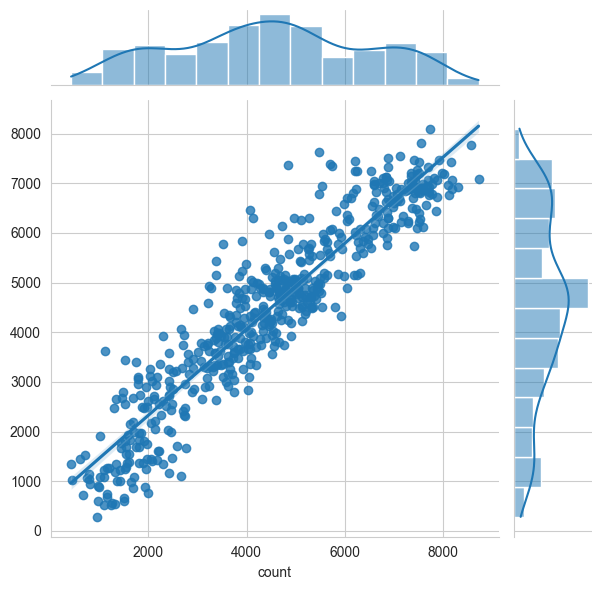

In [846]:
sns.jointplot(x=y_train,y=y_train_pred,kind='reg')

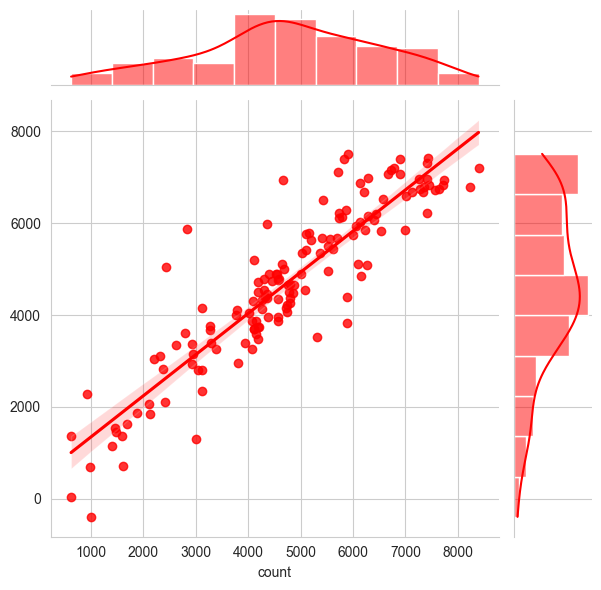

In [847]:
sns.jointplot(x=y_valid,y=y_valid_pred,kind='reg',color='r')

In [848]:
def get_acc_error(org,pred): return round(np.sqrt((org - pred) ** 2).mean() / org.mean() * 100,2)

print(f'Training Dataset Error: {get_acc_error(y_train,y_train_pred)} %')
print(f'Test Dataset Error: {get_acc_error(y_valid,y_valid_pred)} %')

Training Dataset Error: 12.46 %
Test Dataset Error: 11.92 %


> Feature Importance.

Text(0.5, 1.0, 'Feature Importance')

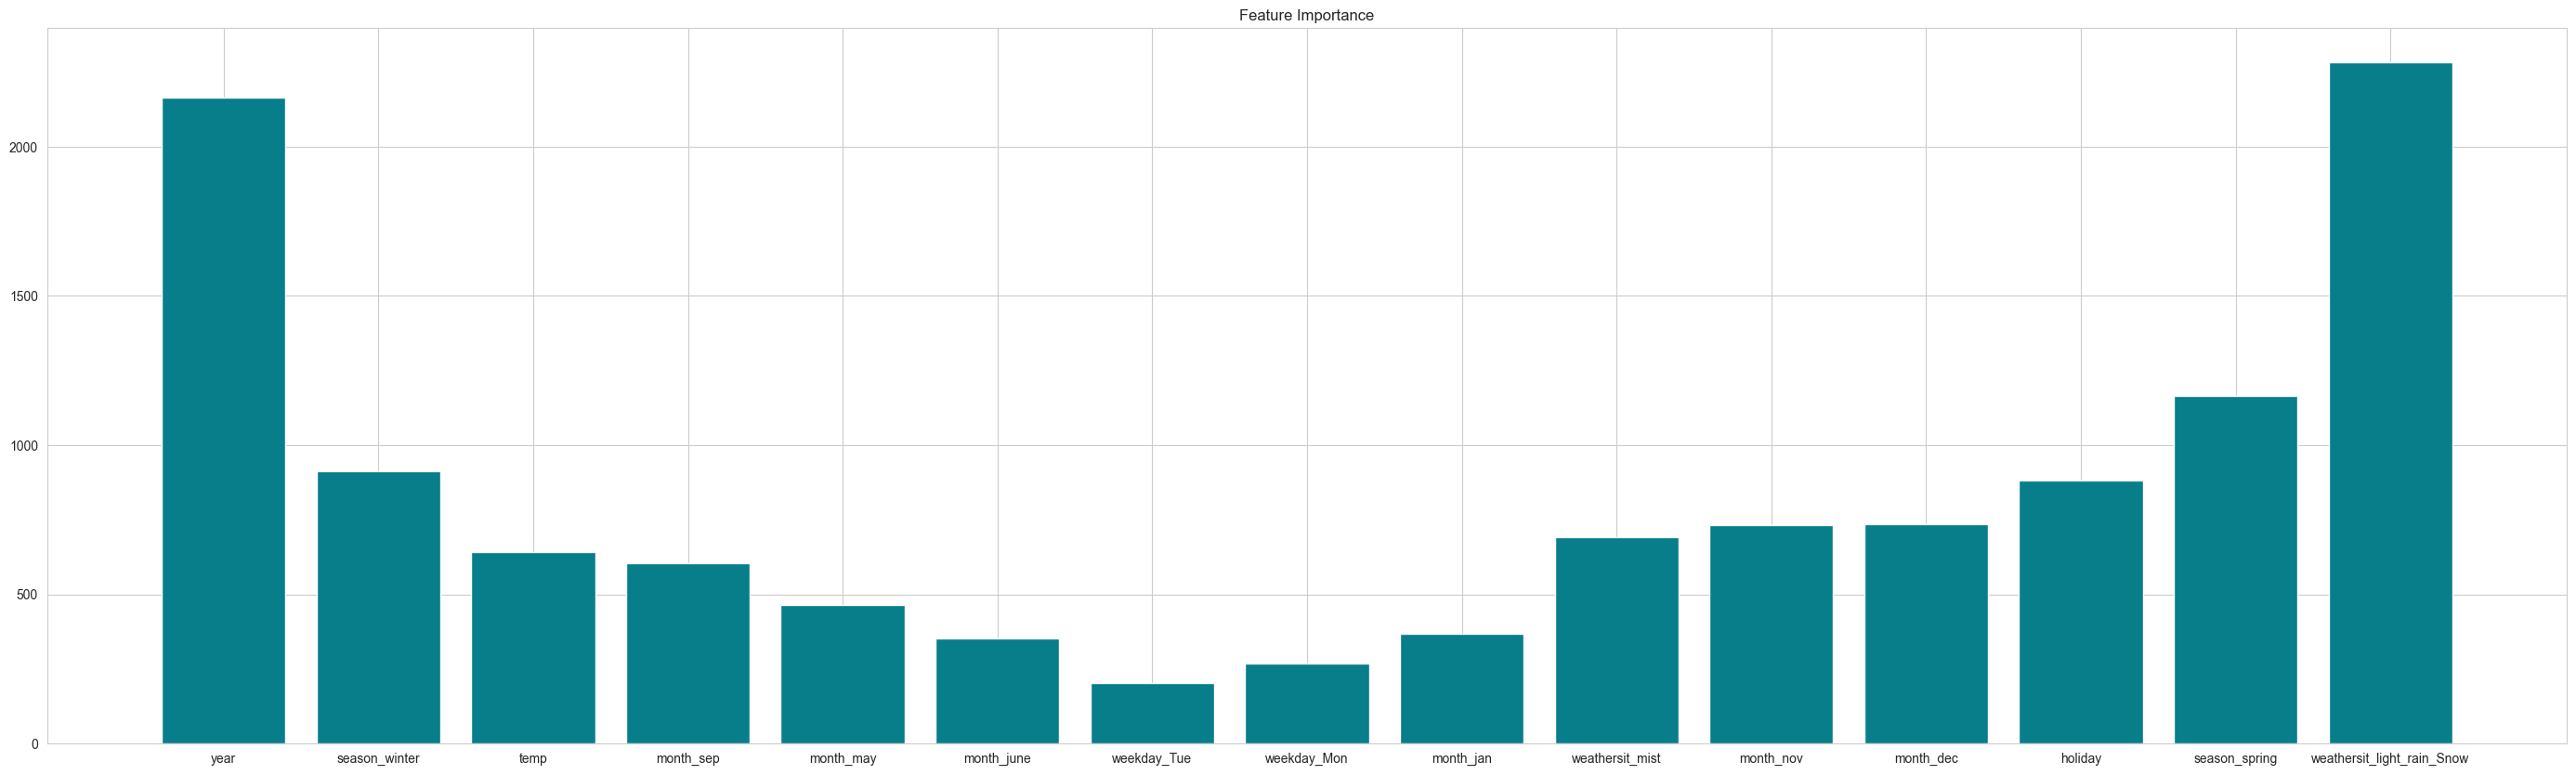

In [849]:
fi = lm5.params.to_frame().reset_index()
fi.columns = ['variable','coeff']
fi = fi.sort_values('coeff',ascending=False)
fi = fi[~(fi['variable']=='const')]
plt.figure(figsize=(35,10))
plt.bar(x=fi['variable'], height=abs(fi['coeff']), color='#087E8B')
plt.title('Feature Importance')
